In [1]:
import numpy as np
import pyDOE
import matplotlib.pyplot as plt
from glob import glob

## Complex_Wave__dataset

* Task를 샘플링한다.
    * A는 1 ~ 11의 범위, B와 C는 0.5 ~ 2의 범위
    * 총 Task는 100개
    * 각 Task별로 5000개의 데이터를 사용한다.

In [2]:
## Governing equation
def func1(x,y,a=1,b=1,c=1):
    return a*np.sin(b*x)*np.sin(c*y)

## Train Task sampling 
train_sampling = pyDOE.lhs(3, samples=50)
A_sampling = 1.0+(train_sampling.T[0])*10
B_sampling = 0.5+(train_sampling.T[1])*1.5
C_sampling = 0.5+(train_sampling.T[2])*1.5
train_sampling = np.round(np.stack([A_sampling,B_sampling,C_sampling],axis=1), decimals=4)

## Test Interpolation Task sampling 
inter_sampling = pyDOE.lhs(3, samples=5)
A_sampling = 1.0+(inter_sampling.T[0])*10
B_sampling = 0.5+(inter_sampling.T[1])*1.5
C_sampling = 0.5+(inter_sampling.T[2])*1.5
inter_sampling = np.round(np.stack([A_sampling,B_sampling,C_sampling],axis=1), decimals=4)

## Test Extrapolation Task sampling 
extra_sampling = pyDOE.lhs(3, samples=5)
A_sampling = 11+(extra_sampling.T[0])
B_sampling = 2+(extra_sampling.T[1])
C_sampling = 2+(extra_sampling.T[2])
extra_sampling = np.round(np.stack([A_sampling,B_sampling,C_sampling],axis=1), decimals=4)

train_sampling

array([[ 1.5373,  1.5664,  0.9814],
       [ 5.7376,  0.5842,  1.7528],
       [ 2.4963,  1.0452,  1.8264],
       [ 1.6022,  1.1533,  0.5423],
       [ 7.0884,  1.6498,  1.799 ],
       [10.7792,  1.8288,  1.9488],
       [ 9.555 ,  1.7564,  1.7854],
       [ 8.6977,  1.5375,  0.813 ],
       [ 7.5959,  1.6005,  0.9126],
       [ 3.2402,  0.5998,  1.9392],
       [ 4.4709,  0.914 ,  1.1784],
       [ 5.0783,  1.3275,  1.4057],
       [ 9.8494,  1.2598,  1.997 ],
       [ 3.0924,  0.6965,  1.3629],
       [ 4.2657,  1.2195,  1.1131],
       [ 8.8302,  0.6671,  1.2786],
       [ 4.9696,  1.2248,  0.5298],
       [ 9.0954,  0.8845,  0.8631],
       [ 9.6531,  0.5376,  1.1901],
       [ 5.9315,  1.4954,  0.7609],
       [10.4009,  1.129 ,  0.7258],
       [10.9051,  0.8329,  0.5938],
       [ 3.7041,  0.5063,  1.8544],
       [ 1.8056,  1.1727,  1.4628],
       [ 4.7612,  1.0784,  0.9269],
       [ 8.234 ,  1.3543,  1.5924],
       [ 7.8921,  1.7012,  1.2369],
       [ 6.3095,  1.6712,  1

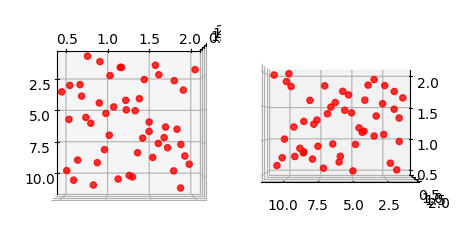

In [3]:
# Creating figure
color_list = ["red", "blue", "green"]
# Creating plot
fig = plt.figure(figsize=(10,3))
wf = fig.add_subplot(111, projection='3d')
x = train_sampling.T[0]
y = train_sampling.T[1]
f = train_sampling.T[2]
wf.scatter3D(x, y, f, color = "r", alpha=0.8)
wf.view_init(90, 0)

wf = fig.add_subplot(122, projection='3d')
x = train_sampling.T[0]
y = train_sampling.T[1]
f = train_sampling.T[2]
wf.scatter3D(x, y, f, color = "r", alpha=0.8)
wf.view_init(0, 90)
plt.show()

In [5]:
# 50*10000개의 train_data
with open(f'./data/train_domain_collo.npy', 'wb') as f:
    
    write_data = []
    for idx, Task in enumerate(train_sampling):
        # 각 Task 별로 -pi ~ pi 사이의 (x,y) 데이터 10000개 생성
        sample_data = pyDOE.lhs(2, samples=10000)
        sample_data -= 0.5
        sample_data *= 2 * np.pi
        result = np.array([func1(i[0],i[1],a=Task[0],b=Task[1],c=Task[2]) for i in sample_data])
        train_data = np.concatenate([sample_data, result[:,None], Task[None,:].repeat(10000, axis=0)], axis=1)
        write_data.append(train_data)
        
    np.save(f, np.concatenate(write_data, axis=0))
f.close()

In [6]:
# 5*10000개의 test_interpolation_data
with open(f'./data/test_interpolation.npy', 'wb') as f:
    
    write_data = []
    for idx, Task in enumerate(inter_sampling):
        # 각 Task 별로 -pi ~ pi 사이의 (x,y) 데이터 10000개 생성
        sample_data = pyDOE.lhs(2, samples=10000)
        sample_data -= 0.5
        sample_data *= 2 * np.pi
        result = np.array([func1(i[0],i[1],a=Task[0],b=Task[1],c=Task[2]) for i in sample_data])
        train_data = np.concatenate([sample_data, result[:,None], Task[None,:].repeat(10000, axis=0)], axis=1)
        write_data.append(train_data)
        
    np.save(f, np.concatenate(write_data, axis=0))
f.close()

In [7]:
# 5*10000개의 test_extrapolation_data
with open(f'./data/test_extrapolation.npy', 'wb') as f:
    
    write_data = []
    for idx, Task in enumerate(extra_sampling):
        # 각 Task 별로 -pi ~ pi 사이의 (x,y) 데이터 10000개 생성
        sample_data = pyDOE.lhs(2, samples=10000)
        sample_data -= 0.5
        sample_data *= 2 * np.pi
        result = np.array([func1(i[0],i[1],a=Task[0],b=Task[1],c=Task[2]) for i in sample_data])
        train_data = np.concatenate([sample_data, result[:,None], Task[None,:].repeat(10000, axis=0)], axis=1)
        write_data.append(train_data)
        
    np.save(f, np.concatenate(write_data, axis=0))
f.close()